In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random

In [3]:
class const:
    label = 'CI'  # AF,AS,MI,CI
    label_ch = '脑梗'  # 房颤,动脉粥样硬化,心梗,脑梗
    important_feature_num = 50
    confidence_score_f = '平方法'
    do_write_json_path = r'%s%s-confidence-score-dict-num=%d-func=%s-normalization.json'
    sample_num = 500
plt.style.use('_mpl-gallery')
plt.rcParams['font.family'] = ['SimHei', 'Times New Roman']

In [ ]:
# thresholds_dict["true"]["pred_pro_confidence"] = list(thresholds_dict["true"]["pred_pro_confidence"]/ np.max(thresholds_dict["true"]["pred_pro_confidence"]))
# thresholds_dict["false"]["pred_pro_confidence"] = list(thresholds_dict["false"]["pred_pro_confidence"]/ np.max(thresholds_dict["false"]["pred_pro_confidence"]))

房颤：


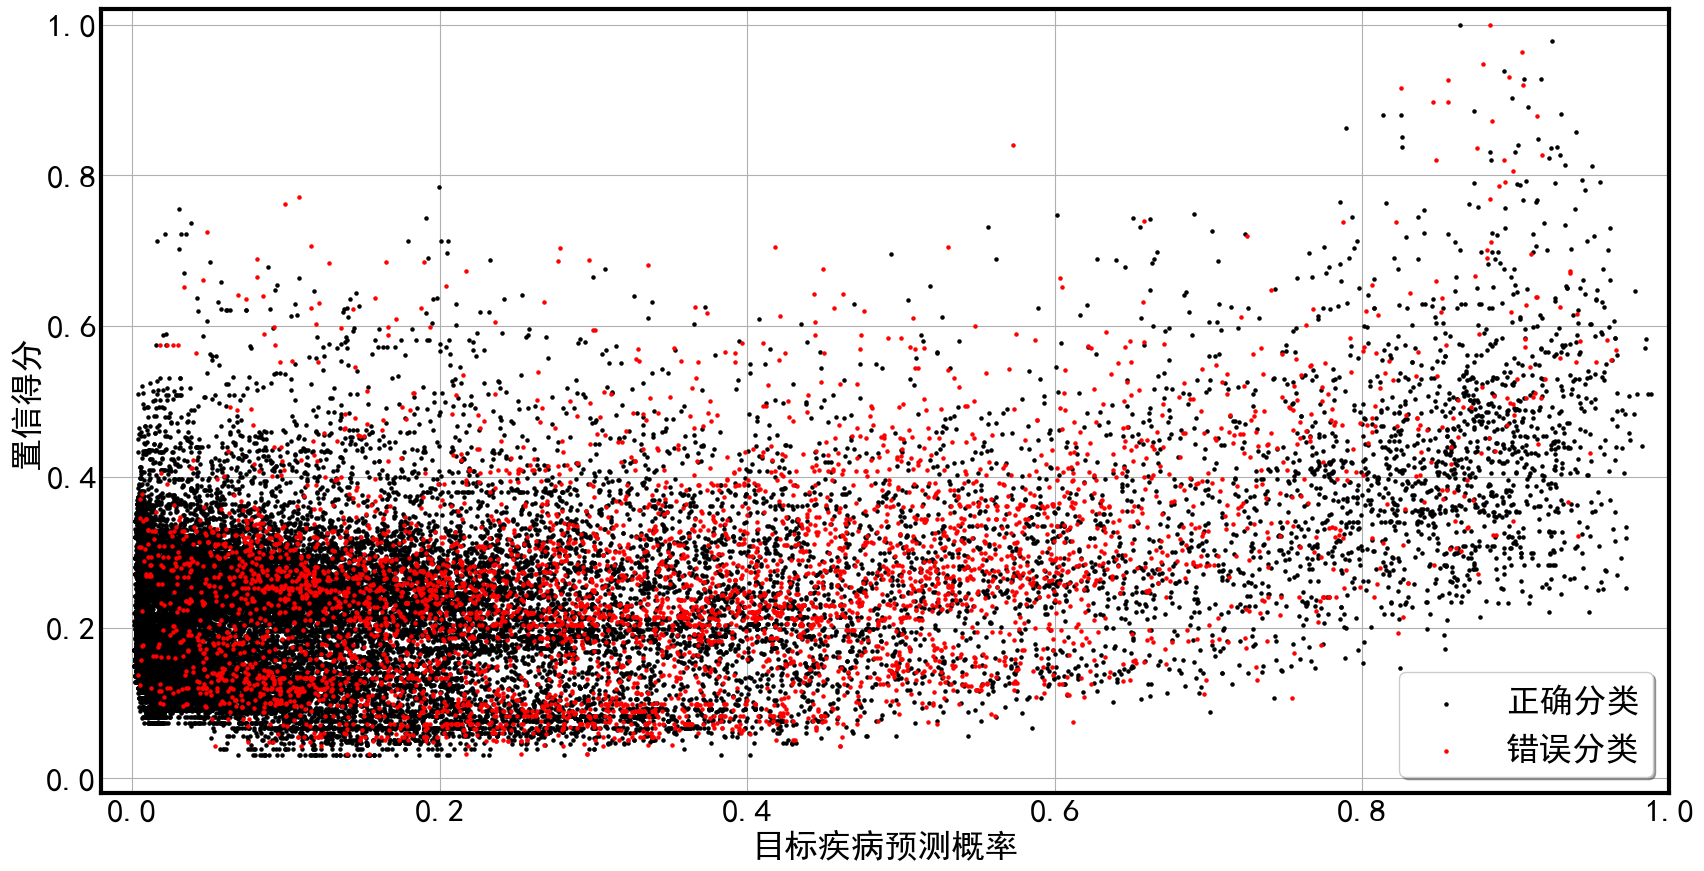

动脉粥样硬化：


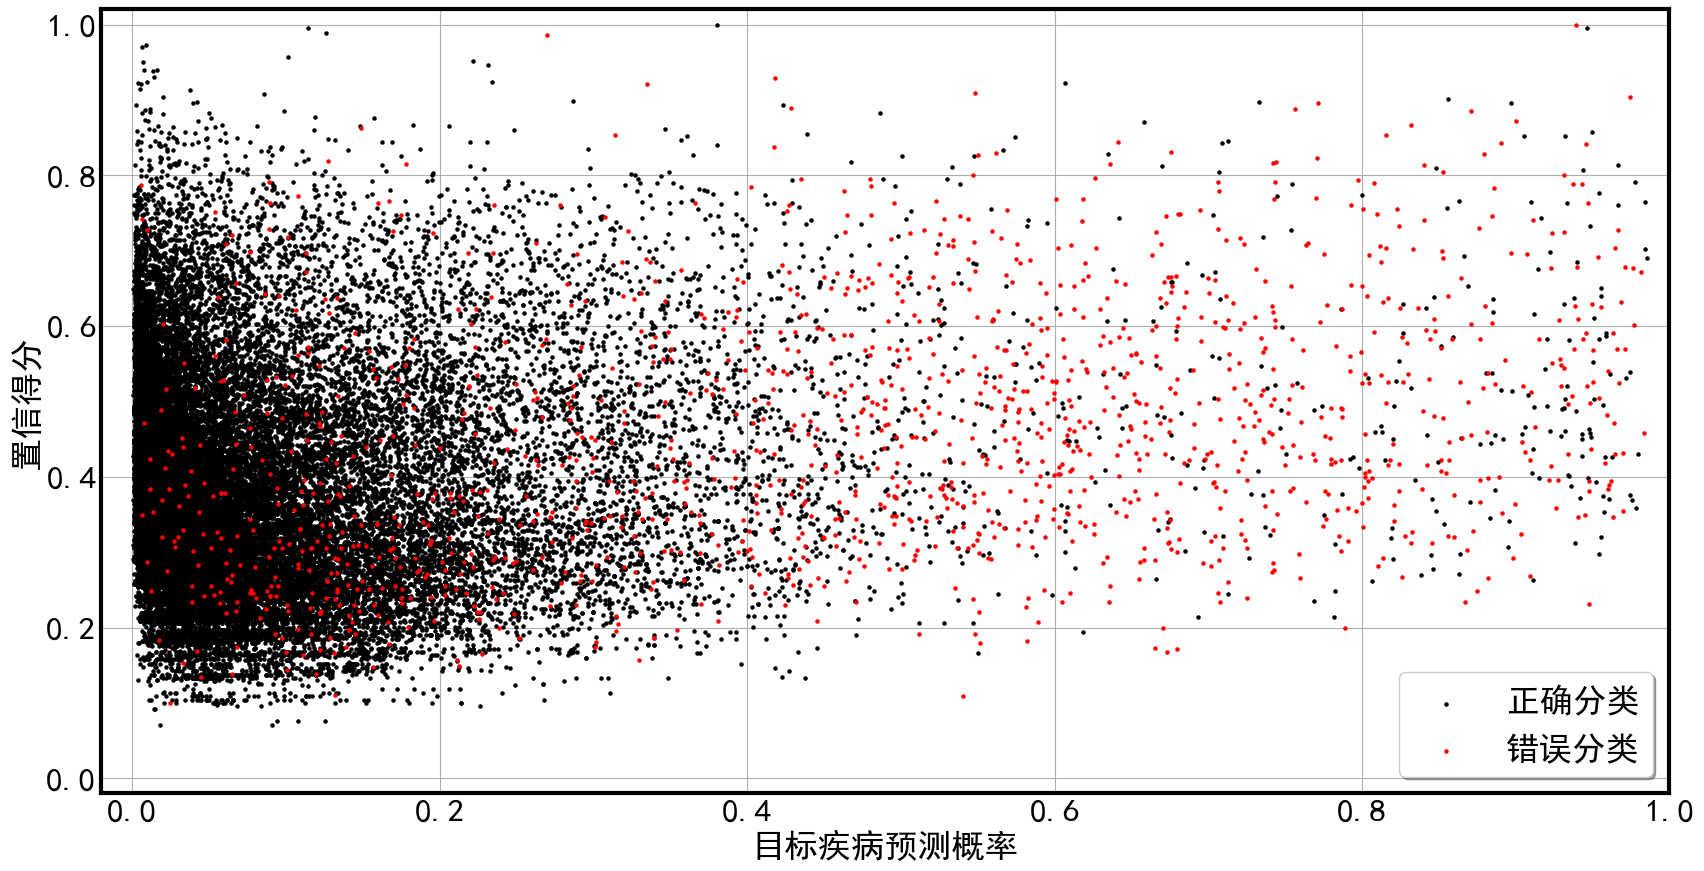

心梗：


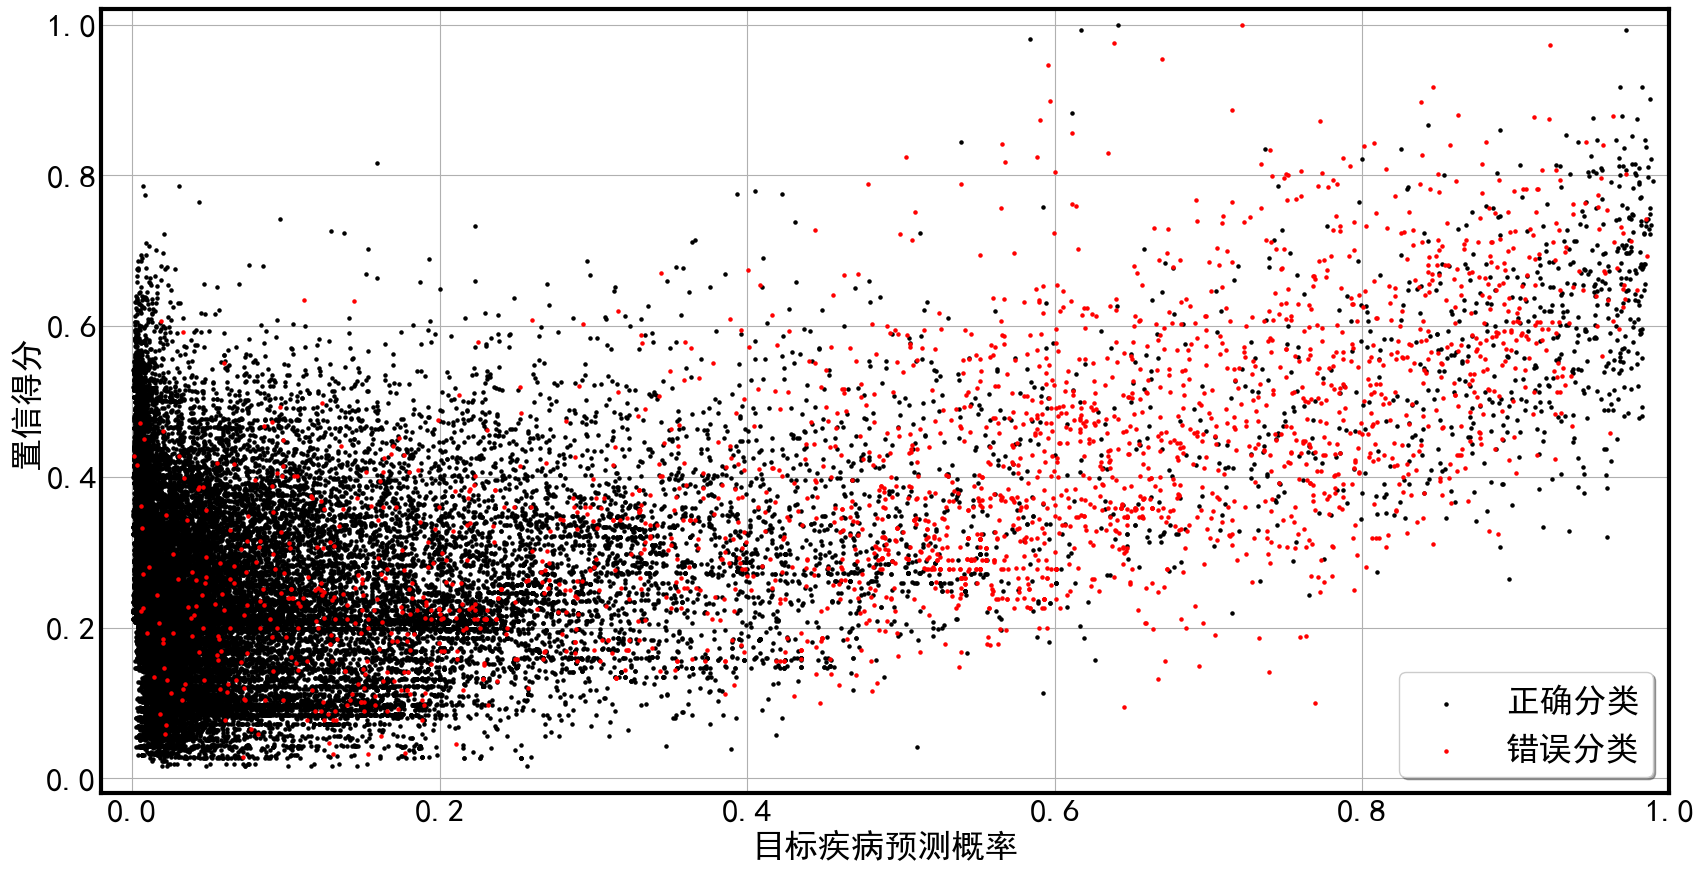

脑梗：


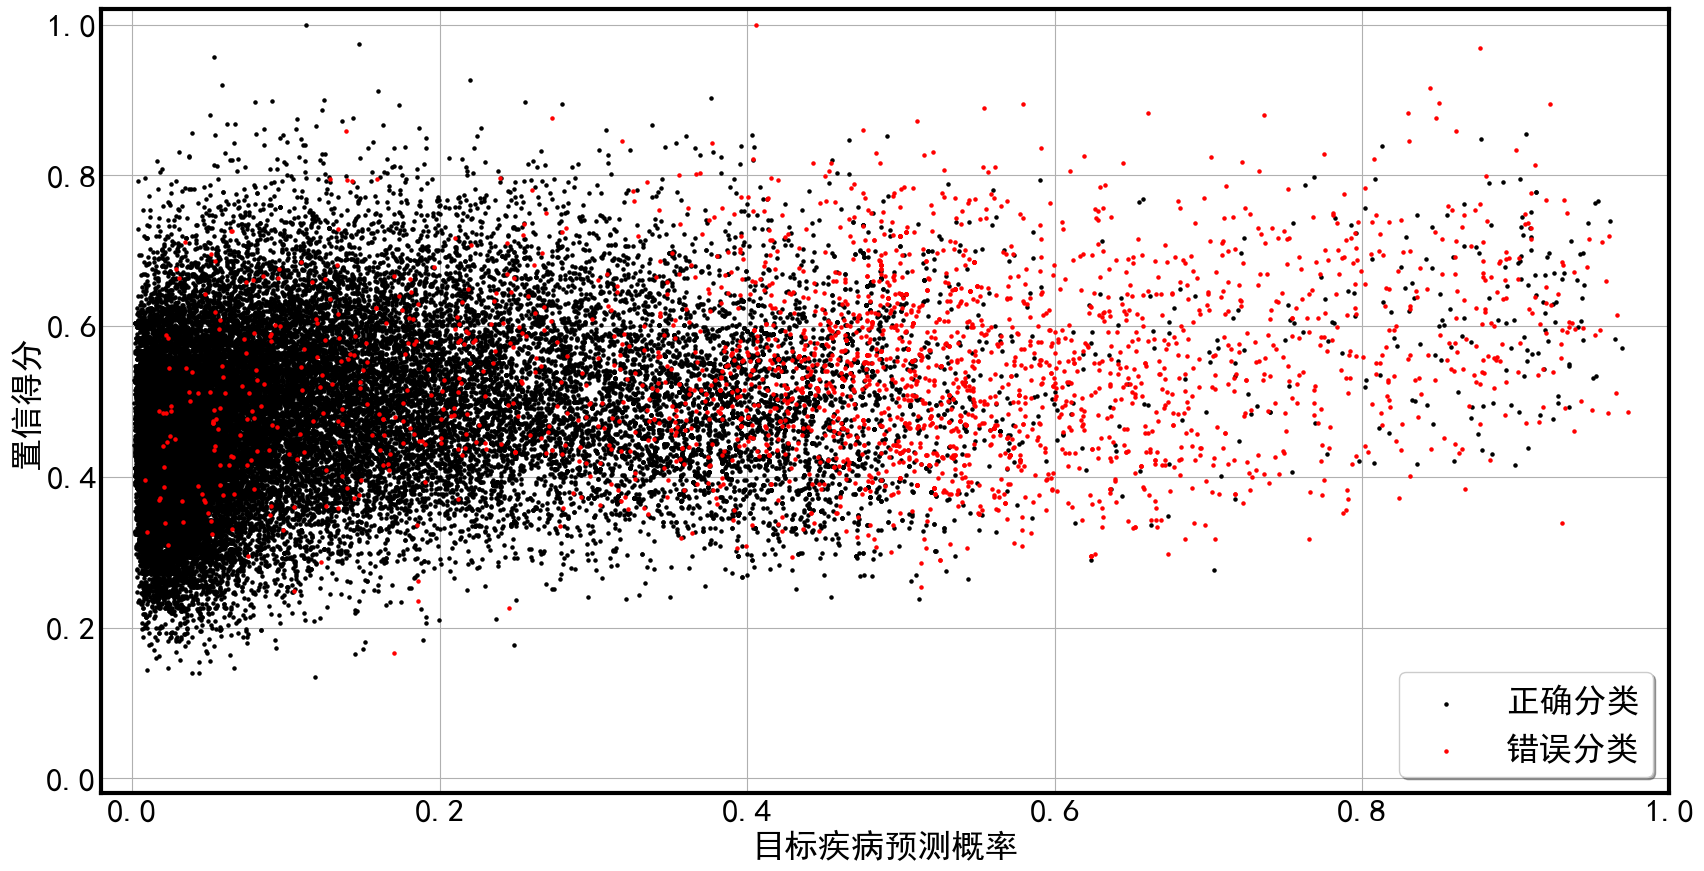

In [6]:
def plt_confidence(label_ch, label):
    print("%s：" % label_ch)
    now_json_path_file_name = const.do_write_json_path % (label_ch, label, const.important_feature_num, const.confidence_score_f)
    thresholds_dict = json.load(open(now_json_path_file_name, 'r', encoding='utf-8'))
    fig_thresholds = plt.figure(figsize=(16, 8))
    ax1 = fig_thresholds.add_subplot(111)
    plt.scatter(thresholds_dict["true"]["pred_pro_mean"], thresholds_dict["true"]["pred_pro_confidence"], label='正确分类', c='k', s=5)
    plt.scatter(thresholds_dict["false"]["pred_pro_mean"], thresholds_dict["false"]["pred_pro_confidence"], label='错误分类', c='r', s=5)
    plt.rcParams.update({'font.size': 24})
    plt.legend(loc="lower right", shadow=True, fancybox=True)
    plt.xlabel('目标疾病预测概率')
    plt.ylabel('置信得分')
    ax1.set_xlim([-0.02, 1.0])
    ax1.set_ylim([-0.02, 1.02])
    ax1.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax1.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax1.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax1.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    plt.show()
plt_confidence('房颤', 'AF')
plt_confidence('动脉粥样硬化', 'AS')
plt_confidence('心梗', 'MI')
plt_confidence('脑梗', 'CI')

## 抽样查看

房颤：


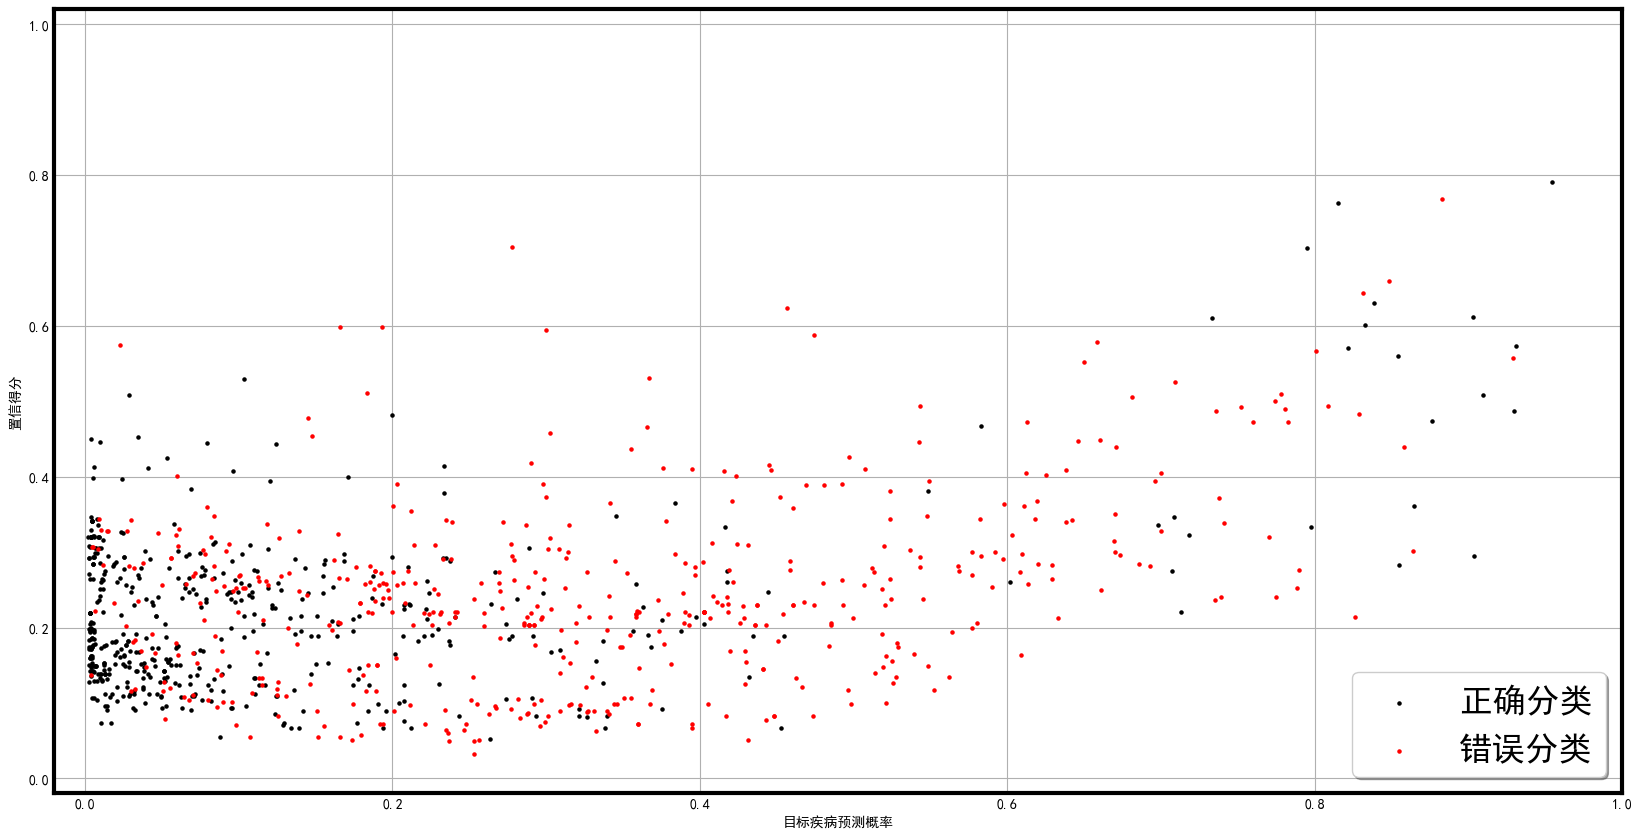

动脉粥样硬化：


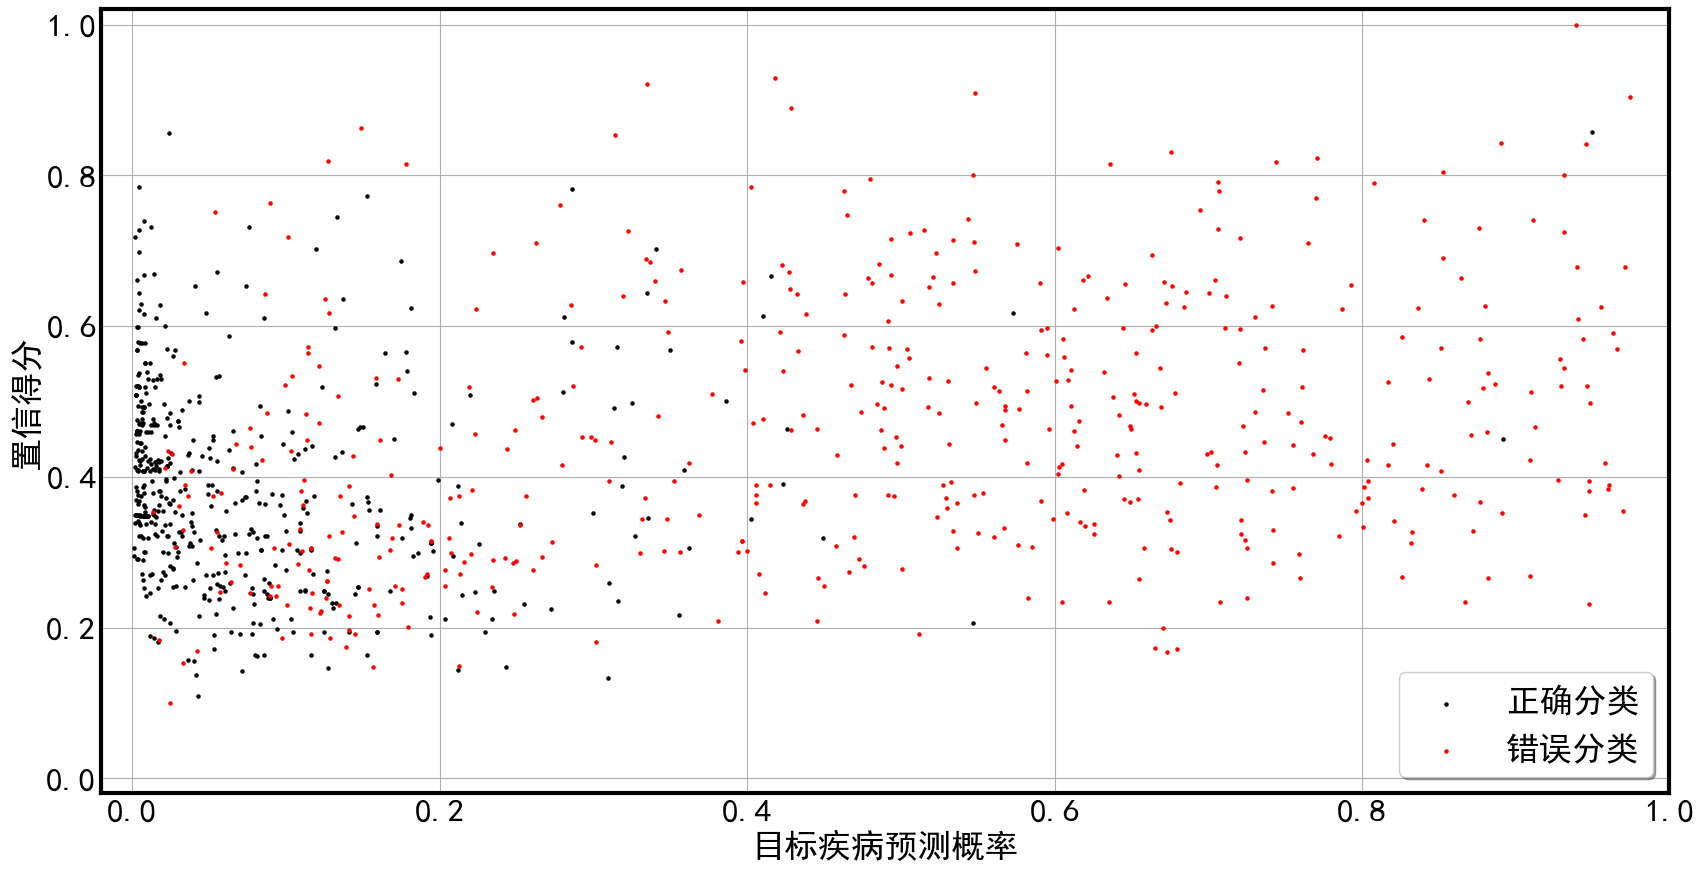

心梗：


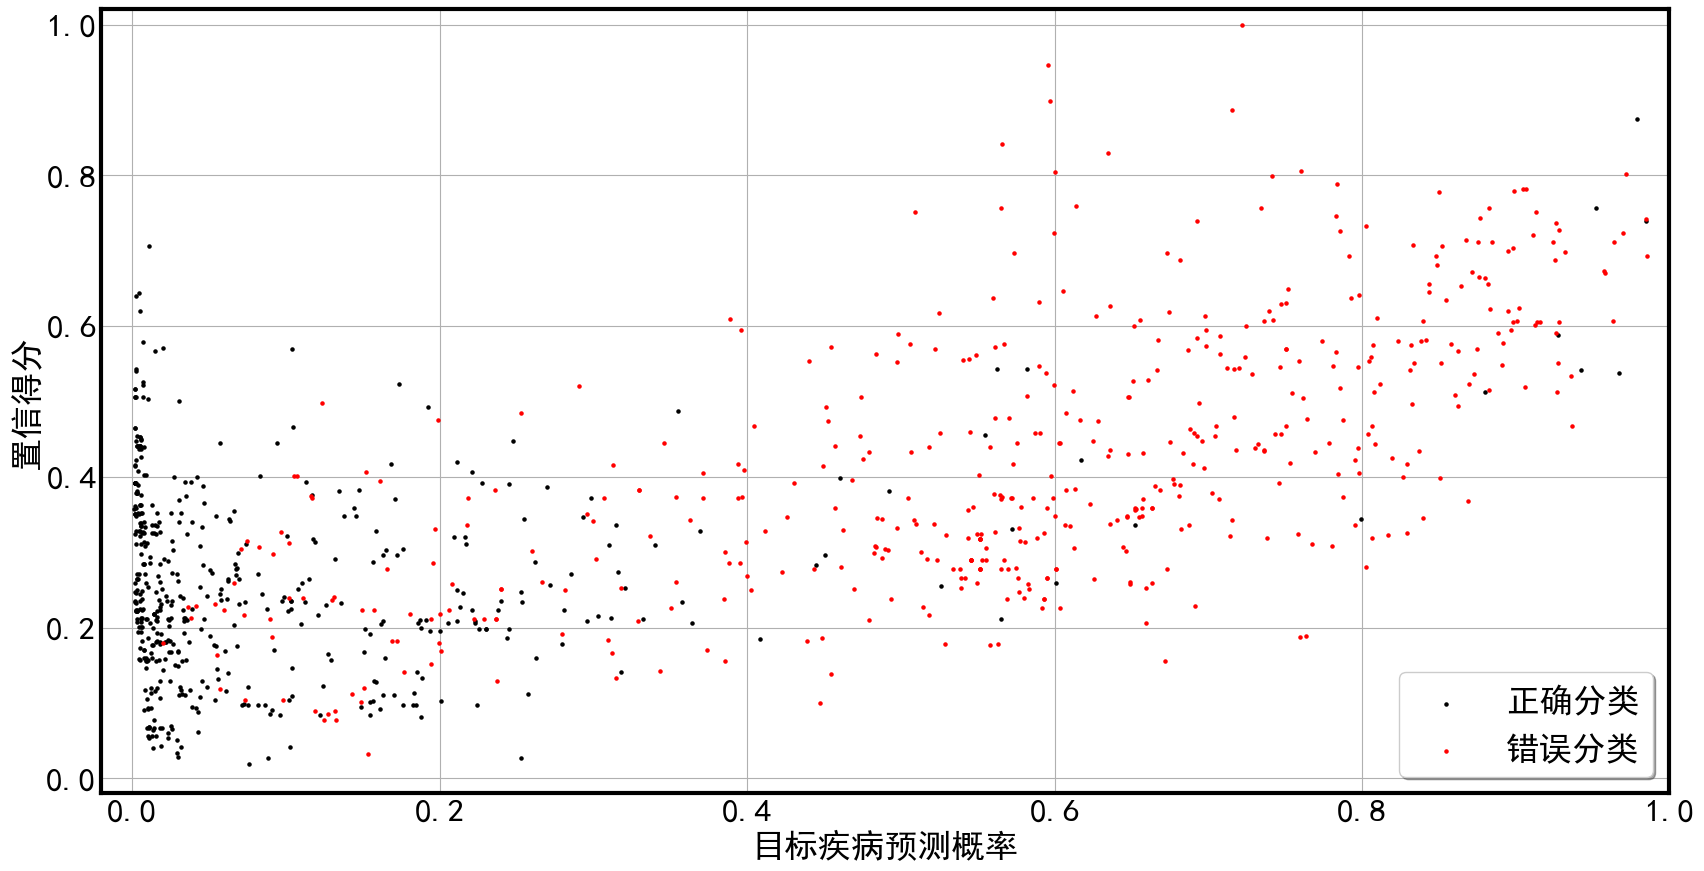

脑梗：


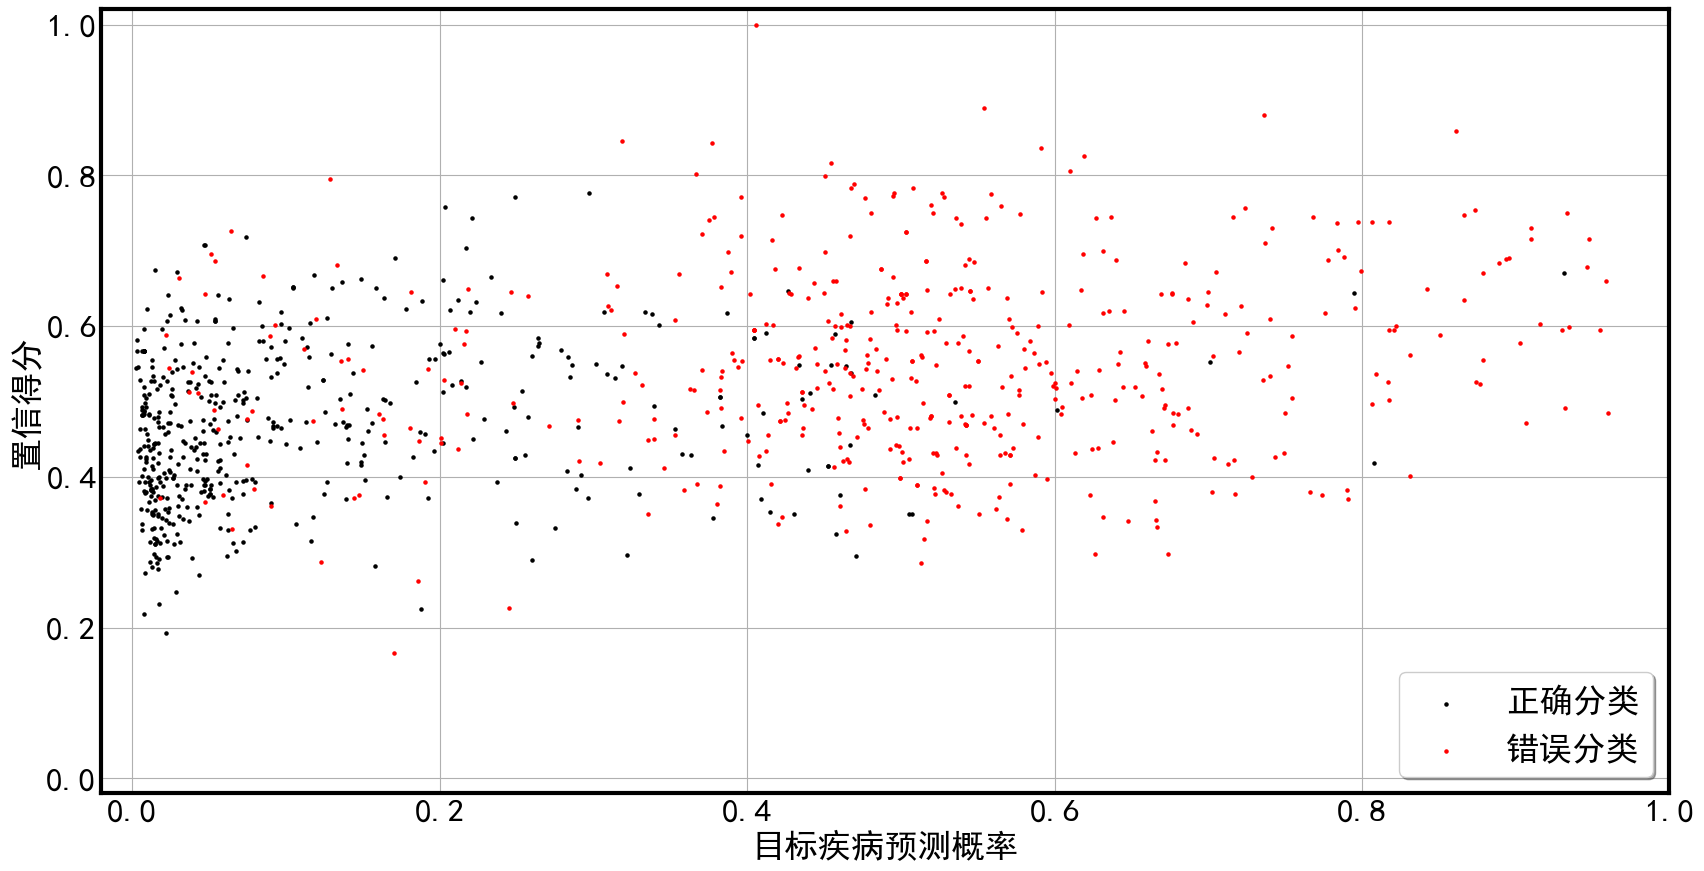

In [5]:
def plt_confidence_sample(label_ch, label):
    print("%s：" % label_ch)
    now_json_path_file_name = const.do_write_json_path % (label_ch, label, const.important_feature_num, const.confidence_score_f)
    thresholds_dict = json.load(open(now_json_path_file_name, 'r', encoding='utf-8'))

    temp_data = np.array([thresholds_dict["true"]["pred_pro_mean"],thresholds_dict["true"]["pred_pro_confidence"]])
    sample_list = random.sample([i for i in range(temp_data.shape[1])], const.sample_num)
    pred_pro_mean_true = temp_data[:,sample_list][0]
    pred_pro_confidence_true_normalization = temp_data[:,sample_list][1]

    temp_data = np.array([thresholds_dict["false"]["pred_pro_mean"],thresholds_dict["false"]["pred_pro_confidence"]])
    sample_list = random.sample([i for i in range(temp_data.shape[1])], const.sample_num)
    pred_pro_mean_false = temp_data[:,sample_list][0]
    pred_pro_confidence_false_normalization = temp_data[:,sample_list][1]

    fig_thresholds = plt.figure(figsize=(16, 8))
    ax1 = fig_thresholds.add_subplot(111)
    plt.scatter(pred_pro_mean_true, pred_pro_confidence_true_normalization, label='正确分类', c='k', s=5)
    plt.scatter(pred_pro_mean_false, pred_pro_confidence_false_normalization, label='错误分类', c='r', s=5)
    plt.rcParams.update({'font.size': 24})
    plt.legend(loc="lower right", shadow=True, fancybox=True)
    plt.xlabel('目标疾病预测概率')
    plt.ylabel('置信得分')
    ax1.set_xlim([-0.02, 1.0])
    ax1.set_ylim([-0.02, 1.02])
    ax1.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax1.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax1.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax1.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    plt.show()
plt_confidence_sample('房颤', 'AF')
plt_confidence_sample('动脉粥样硬化', 'AS')
plt_confidence_sample('心梗', 'MI')
plt_confidence_sample('脑梗', 'CI')